In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import clear_output
import sys
reload(sys)
sys.setdefaultencoding('utf8')
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
import csv

In [21]:

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import re
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

In [15]:
idn = pd.read_csv('IDNTIMES.txt',encoding= 'utf8', sep=';', header = None)

In [17]:
idn.columns = ["Title"]

In [18]:
idn

,Title
0,KPK Dalami Pihak Lain di KemenPUPR yang Ikut K...
1,Perbaikan Flyover Cengkareng Butuh Tambahan Wa...
2,KPK: Korupsi Pengadaan Air di KemenPUPR Terjad...
3,"Minta Fee Proyek Air Minum Donggala, 4 Pejabat..."
4,Bisakah KPK Terapkan Hukuman Mati di Korupsi P...
5,KPK Kecam Korupsi Proyek Pengadaan Air Minum d...
6,"KPK Tetapkan 8 Tersangka OTT, Termasuk 4 Pejab..."
7,Amanah Menteri PUPR Tercoreng Gara-Gara Anak B...
8,"Anak Buahnya Kena OTT, Menteri PUPR Tunggu Pen..."
9,OTT KPK di Kementerian PUPR Terkait Proyek Air...


In [19]:
tags_lower = idn['Title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

In [22]:
stop_words = list(get_stop_words('id'))         
nltk_words = list(stopwords.words('indonesian'))   
stop_words.extend(nltk_words)

In [23]:
word_tokens_tags = word_tokenize(tags_remove_pun)
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]
filtered_sentence_tags = []
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

In [24]:
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

In [25]:
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()]    

In [26]:
top_N = 10000

In [27]:
word_dist_tags = nltk.FreqDist(cleaned_data_tags)
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N),
                    columns=['Word', 'Frequency'])

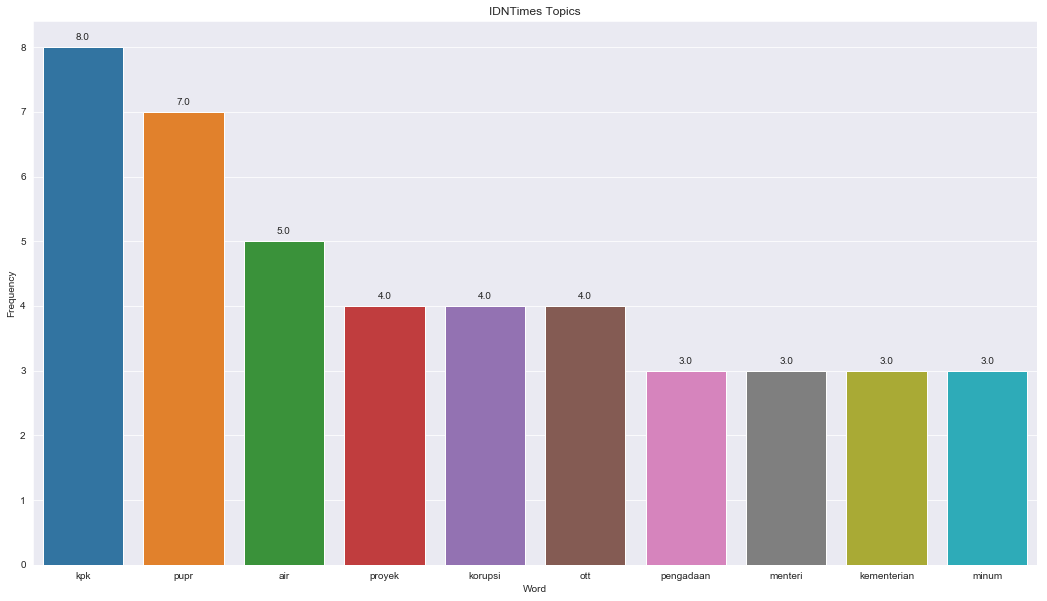

In [40]:
plt.figure(figsize=(18,10))
sns.set_style("darkgrid")
plt.title('IDNTimes Topics')
ax = sns.barplot(x="Word",y="Frequency", data=rslt_tags.head(10))


rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)

In [29]:
bloblist_desc = list()

train_descr_str=idn['Title'].astype(str)
for row in train_descr_str:
    blob = TextBlob(row)
    an = blob.translate(from_lang='id', to='en')
    bloblist_desc.append((row,an.sentiment.polarity, an.sentiment.subjectivity))
    train_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','polarity','subjectivity'])


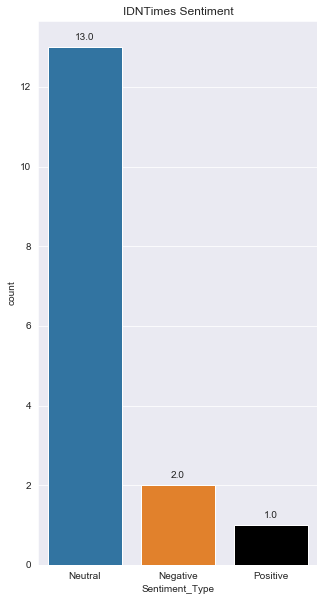

In [32]:
 
def f(train_polarity_desc):
    if train_polarity_desc['polarity'] > 0:
        val = "Positive"
    elif train_polarity_desc['polarity'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

train_polarity_desc['Sentiment_Type'] = train_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(5,10))
sns.set_style("darkgrid")
plt.title('IDNTimes Sentiment')
ax = sns.countplot(x="Sentiment_Type", data=train_polarity_desc, palette=["C0", "C1", "k"])

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)


In [39]:
train_polarity_desc

,sentence,polarity,subjectivity,Sentiment_Type
0,KPK Dalami Pihak Lain di KemenPUPR yang Ikut K...,0.000,0.066667,Neutral
1,Perbaikan Flyover Cengkareng Butuh Tambahan Wa...,0.000,0.100000,Neutral
2,KPK: Korupsi Pengadaan Air di KemenPUPR Terjad...,0.000,0.000000,Neutral
3,"Minta Fee Proyek Air Minum Donggala, 4 Pejabat...",0.000,0.000000,Neutral
4,Bisakah KPK Terapkan Hukuman Mati di Korupsi P...,0.000,0.000000,Neutral
5,KPK Kecam Korupsi Proyek Pengadaan Air Minum d...,0.000,0.000000,Neutral
6,"KPK Tetapkan 8 Tersangka OTT, Termasuk 4 Pejab...",0.000,0.000000,Neutral
7,Amanah Menteri PUPR Tercoreng Gara-Gara Anak B...,0.000,0.066667,Neutral
8,"Anak Buahnya Kena OTT, Menteri PUPR Tunggu Pen...",0.000,0.000000,Neutral
9,OTT KPK di Kementerian PUPR Terkait Proyek Air...,0.000,0.400000,Neutral


In [35]:
bloblist_desc = list()
from translate import Translator
translator= Translator(from_lang="id", to_lang="en")

In [36]:
train_descr_str1=idn['Title'].astype(str)
for row in train_descr_str1:
    an = translator.translate(row)
    blob = TextBlob(an)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    train_polarity_desc1 = pd.DataFrame(bloblist_desc, columns = ['sentence','polarity','subjectivity'])


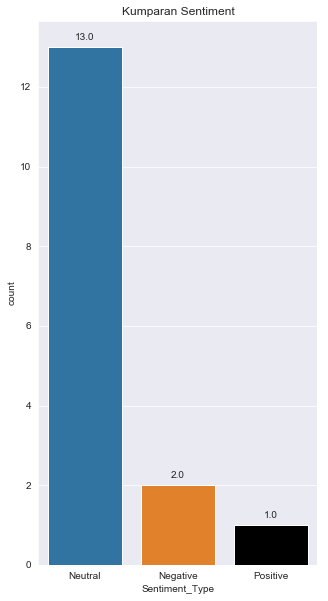

In [37]:
 
def f(train_polarity_desc1):
    if train_polarity_desc1['polarity'] > 0:
        val = "Positive"
    elif train_polarity_desc1['polarity'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

train_polarity_desc1['Sentiment_Type'] = train_polarity_desc1.apply(f, axis=1)

plt.figure(figsize=(5,10))
sns.set_style("darkgrid")
plt.title('Kumparan Sentiment')
ax = sns.countplot(x="Sentiment_Type", data=train_polarity_desc1, palette=["C0", "C1", "k"])

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)
